# Tweets_Fans_Focus_OM

In [15]:
from IPython.display import clear_output
clear_output()
import advertools as adv
import pandas as pd
pd.options.display.max_columns = None
import tweepy 
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
from spellchecker import SpellChecker
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.snowball import FrenchStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Retrieving data for Marseille, using Tweepy

In [16]:
consumer_key = "d1vumEybD0TVgu9ymbXHQKLkv"
consumer_secret = "XLz9UuTAlmMv4JiAYAIaU5BbcjBAxqRAvVU2jO16lyMkDllx9S"
access_key = "895649658-jgwnVKSSsNQQ9WY2thpYegi7ZljM2dDdR2lb578x"
access_secret = "RF9aEUKkjhFq6Unj5bVAyfSd0Pydj7IE53VlUqQFhIoJw"
    
def initialize():
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tw.API(auth, wait_on_rate_limit=True)
    return api
api = initialize()

In [84]:
# Define the search term and the date_since date as variables
search_words = ('#olympiquedemarseille OR #droitaubut OR #forzaom OR #teamom OR #allezom OR #omnation')
date_since = "2018-11-16"

new_search = search_words + " -filter:retweets"


In [87]:
tweets = tw.Cursor(api.search,
                           q=new_search,
                           lang = 'en',
                           since=date_since).items(2000)


users_locs = [[tweet.text, tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.retweet_count] for tweet in tweets]
users_locs

[['@OM_LeReseau Carnus\nCasoni\nCheyrou\nCantona\nCourbis\n.\n\U0001f90d💙⭐️ #TeamOM',
  datetime.datetime(2020, 11, 8, 15, 16, 32),
  'sig_duberos',
  'Paris, France',
  0],
 ['Le post de Thauvin pour "Call Of Duty Mobile" :\n\nvia Instagram\n\n#TeamOM https://t.co/GfRjj0dg3h',
  datetime.datetime(2020, 11, 8, 14, 55, 54),
  'Fanatic0M',
  '',
  0],
 ['"I\'ve heard that giving a 4 years contract to an old has-been man is stupid, but look what Jacques-Henri Eyraud, th… https://t.co/LqvRtdJ0hF',
  datetime.datetime(2020, 11, 8, 10, 11, 55),
  'PlanetOheme',
  'Marseille, France',
  2],
 ["C'est parti les d'amis, 1er pointcen jeu for the Day+1 for Biden\nGo &amp; good luck \n@ValocheVava @MichellePooky… https://t.co/yXPYaZkhVx",
  datetime.datetime(2020, 11, 8, 9, 18, 16),
  'VidoandMC',
  'Lunel, France',
  0],
 ["IT'S A FUCKING WAAAAAALL @SteveMandanda🧤 https://t.co/ECLSejgpZz\nBest French Goalkeeper since 20 Years !!!\n#TeamOM",
  datetime.datetime(2020, 11, 7, 22, 12, 53),
  'Karma_Su

In [83]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['text','date','user', "location","retweet"])
tweet_text

,text,date,user,location,retweet


First cleaning of the data

In [20]:
corpus = []
Longueur = range(0,20000)
for i in Longueur:
    try:
        recherche = re.sub("[^a-zA-Z]", " ",tweet_text['text'][i])
        recherche = re.sub("https?://[A-Za-z0-9./]*"," ",tweet_text['text'][i])
    except KeyError:
            continue
    recherche = recherche.lower()
    recherche = recherche.split()
    recherche = ' '.join(recherche)

    corpus.append(recherche)

In [21]:

tweet_text['text'] = corpus

In [22]:
tweet_text

,text,date,user,location,retweet
0,"""i've heard that giving a 4 years contract to ...",2020-11-08 10:11:55,PlanetOheme,"Marseille, France",2
1,"c'est parti les d'amis, 1er pointcen jeu for t...",2020-11-08 09:18:16,VidoandMC,"Lunel, France",0
2,it's a fucking waaaaaall @stevemandanda🧤 best ...,2020-11-07 22:12:53,Karma_Sud,Partout c'est chez nous.,0
3,my birthday 🤩 !! #teamom 🔵⚪️,2020-11-07 21:32:57,sla94140,France,0
4,@realjameswoods my french football team⚽ alway...,2020-11-07 18:59:30,hineraumati,France / España,0
...,...,...,...,...,...
209,happy halloween #halloween #halloween2020 #koh...,2020-10-31 07:40:33,AR3Oo0A_D_X_VHF,15e systeme solaire,1
210,on follow la #teamom,2020-10-31 07:39:08,fernandnaudin_2,,0
211,same energy #teamom,2020-10-30 23:44:10,LowX06,,0
212,buuuuuut de thauvin ! #teamom #omrcl #rclens 1...,2020-10-30 19:53:19,OMathou18,,0


In [23]:
analyzer = SentimentIntensityAnalyzer()

In [24]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(tweet_text['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(tweet_text['text'][i])["compound"]
    pos = analyzer.polarity_scores(tweet_text['text'][i])["pos"]
    neu = analyzer.polarity_scores(tweet_text['text'][i])["neu"]
    neg = analyzer.polarity_scores(tweet_text['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [25]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = tweet_text.join(sentiments_score)
df.head(10)

,text,date,user,location,retweet,Compound,Positive,Negative,Neutral
0,"""i've heard that giving a 4 years contract to ...",2020-11-08 10:11:55,PlanetOheme,"Marseille, France",2,-0.1280,0.074,0.096,0.830
1,"c'est parti les d'amis, 1er pointcen jeu for t...",2020-11-08 09:18:16,VidoandMC,"Lunel, France",0,0.7096,0.269,0.000,0.731
2,it's a fucking waaaaaall @stevemandanda🧤 best ...,2020-11-07 22:12:53,Karma_Sud,Partout c'est chez nous.,0,0.7249,0.281,0.000,0.719
3,my birthday 🤩 !! #teamom 🔵⚪️,2020-11-07 21:32:57,sla94140,France,0,0.0000,0.000,0.000,1.000
4,@realjameswoods my french football team⚽ alway...,2020-11-07 18:59:30,hineraumati,France / España,0,0.7650,0.268,0.000,0.732
5,@rennes_fan he’s class pal #teamom,2020-11-07 18:10:50,WWFCAVFCTHFC,,0,0.0000,0.000,0.000,1.000
6,#om om – morgan sanson affirme que le coach a ...,2020-11-07 17:52:14,MarseilleFootFr,"Marseille, France",0,0.0000,0.000,0.000,1.000
7,this is the end #venteom #teamom,2020-11-07 16:54:23,Carbo015,"Manche, Basse-Normandie",0,0.0000,0.000,0.000,1.000
8,@leoobalerdi5 👏👏👏👏 crackito 💙💙💙 #teamom,2020-11-07 15:44:19,EdwardTeach1329,Marseille,0,0.9274,0.474,0.000,0.526
9,avb en ce moment 😂 #teamom,2020-11-07 12:41:05,Kayzer59_76,Elbeuf,0,0.4404,0.277,0.139,0.584


In [26]:
df.describe()

,retweet,Compound,Positive,Negative,Neutral
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.728972,0.129217,0.103491,0.034967,0.861533
std,2.096588,0.345090,0.161685,0.093811,0.184556
min,0.000000,-0.749200,0.000000,0.000000,0.361000
25%,0.000000,0.000000,0.000000,0.000000,0.714000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.750000,0.405225,0.223750,0.000000,1.000000
max,15.000000,0.982900,0.639000,0.622000,1.000000


In [27]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.8])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['teamom',
 'venteom',
 'teamom',
 'teamom',
 'rcsom',
 'rcsom',
 'teamom',
 'teamom',
 'teamom',
 'payet',
 'ucl',
 'teamom']

In [28]:
from nltk.corpus import stopwords

# Here I add languages that I think are common
stop_words = stopwords.words(['english', 'french', 'dutch', 'spanish', 'german', 'russian', 'italian'])

## Here we add additional  stopwords
stop_words.extend(['https','http','rubikscube','problemsolving'])

# Building a wordcloud for Marseille's Tweets

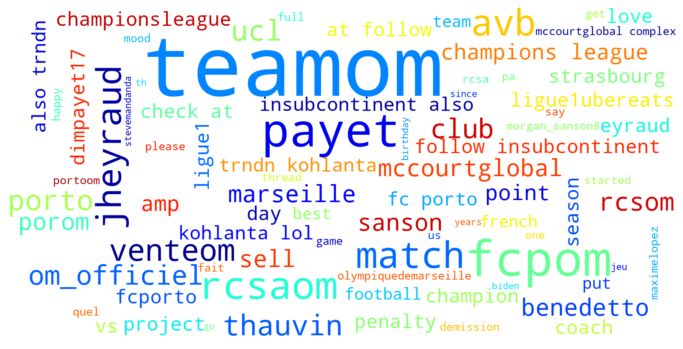

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = stop_words
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['text'])

In [30]:
import advertools

# Emoji & punctuation analysis

In [31]:
emoji_summary = adv.extract_emoji(df['text'])
emoji_summary['overview']

{'num_posts': 214,
 'num_emoji': 216,
 'emoji_per_post': 1.0093457943925233,
 'unique_emoji': 65}

In [32]:
currency_summary = adv.extract_currency(df['text'])
print(currency_summary.keys())
print()
currency_summary['overview']

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])



{'num_posts': 214,
 'num_currency_symbols': 1,
 'currency_symbols_per_post': 0.004672897196261682,
 'unique_currency_symbols': 1}

In [33]:
[t for t in currency_summary['surrounding_text'] if t][:20]

[[' be release soon 🚨 1$…']]

In [34]:
from collections import Counter
Counter(currency_summary['currency_symbols_flat'])


Counter({'$': 1})

# Intensity analysis

In [35]:
intensity_summary = adv.extract_intense_words(df['text'])
print(intensity_summary.keys())
print()
intensity_summary['overview']

dict_keys(['intense_words', 'intense_words_flat', 'intense_word_counts', 'intense_word_freq', 'top_intense_words', 'overview'])



{'num_posts': 214,
 'num_intense_words': 54,
 'intense_words_per_post': 0.2523364485981308,
 'unique_intense_words': 44}

In [36]:
intensity_summary = adv.extract_intense_words(df['text'])
print(intensity_summary.keys())
print()
intensity_summary['overview']

dict_keys(['intense_words', 'intense_words_flat', 'intense_word_counts', 'intense_word_freq', 'top_intense_words', 'overview'])



{'num_posts': 214,
 'num_intense_words': 54,
 'intense_words_per_post': 0.2523364485981308,
 'unique_intense_words': 44}

In [37]:
intensity_summary['top_intense_words'][:30]

[('!!!', 6),
 ('💙💙💙', 2),
 ('...', 2),
 ('😍😍😍', 2),
 ('buuuuuut', 2),
 ('🚨🚨🚨', 2),
 ('waaaaaall', 1),
 ('👏👏👏👏', 1),
 ('bounaaa', 1),
 ('dr...', 1),
 ('m...', 1),
 ('mutat...', 1),
 ('goooall', 1),
 ('sansooon', 1),
 ('gooooool', 1),
 ('goollll', 1),
 ('buuuuuuuuuut', 1),
 ('splendiiiiiiide', 1),
 ('improbable.....', 1),
 ('!!!!!', 1),
 ('5000...#teamom', 1),
 ('thauvin!!!', 1),
 ('se...', 1),
 ('rejointttt', 1),
 ('now...', 1),
 ('....', 1),
 ('point..........', 1),
 ('project.....', 1),
 ('coule...', 1),
 ('penaltyyyyyyy', 1)]

# Question marks analysis

In [38]:
question_summary = adv.extract_questions(df['text'])
print(question_summary.keys())
print()
question_summary['overview']

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])



{'num_posts': 214,
 'num_question_marks': 10,
 'question_marks_per_post': 0.04672897196261682,
 'unique_question_marks': 1}

It is particularly interesting to study questions asked by fans, as it is a direct look into what customers are wondering. Acknowledging their questions and responding accordingly is a real challenge for community managers.

In [39]:
[q for q in question_summary['question_text'] if q][:20]

[['penalty ou pas la #teamom ?'],
 ['#teamom #rcsaom on tire quand lol ?'],
 ['clinton?'],
 ['fuck where is my team ?'],
 ["not sure about this, but isn't it the 3rd penalty that we miss since the season started?"],
 ['#teamom qui a un lien streaming?'],
 ['anyone a free stream for the match tonight?'],
 ['on a mis 6 buts en tout nous?'],
 ["💰 large betting bonuses: 💰 💰 🔥 guess who's back?"]]

In [40]:
exclamation_summary = adv.extract_exclamations(df['text'])
print(exclamation_summary.keys())
print()
exclamation_summary['overview']

dict_keys(['exclamation_marks', 'exclamation_marks_flat', 'exclamation_mark_counts', 'exclamation_mark_freq', 'top_exclamation_marks', 'overview', 'exclamation_mark_names', 'exclamation_text'])



{'num_posts': 214,
 'num_exclamation_marks': 55,
 'exclamation_marks_per_post': 0.2570093457943925,
 'unique_exclamation_marks': 1}

In [41]:
emoji_freq =  adv.word_frequency(df['text'], 
                                 df['retweet'],
                                 regex=adv.emoji.EMOJI_RAW)
emoji_freq.head(20).style.format({'abs_freq': '{:,}', 'wtd_freq': '{:,}', 'rel_value': '{:,.0f}'})

2020-11-08 15:24:59,431 | INFO | utils.py:141 | _init_num_threads | NumExpr defaulting to 8 threads.


,word,abs_freq,wtd_freq,rel_value
0,🔵,28,91,3
1,🟦,18,59,3
2,⬜,18,59,3
3,😭,10,13,1
4,💙,13,12,1
5,💪,3,7,2
6,⚪,7,7,1
7,💯,1,7,7
8,🤍,3,2,1
9,⭐,2,2,1


In [42]:
print('tweets containing 🔵:')
(df
 [df['text'].str.contains('🔵')]
 .filter(regex='retweet')
 .describe()
 .style.format('{:,.2f}'))

tweets containing 🔵:


,retweet
count,23.00
mean,2.74
std,2.99
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,13.00


In [43]:
print('tweets NOT containing 🔵:')
(df
 [~df['text'].str.contains('🔵')]
 .filter(regex='retweet')
 .describe()
 .style.format('{:,.2f}'))

tweets NOT containing 🔵:


,retweet
count,191.00
mean,0.49
std,1.83
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,15.00


# Tentative Topic modelling

In [44]:
# Load the regular expression library
import re
# Remove punctuation
df['text'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text'] = df['text'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text'].head()

0    "i've heard that giving a 4 years contract to ...
1    c'est parti les d'amis 1er pointcen jeu for th...
2    it's a fucking waaaaaall @stevemandanda🧤 best ...
3                           my birthday 🤩  #teamom 🔵⚪️
4    @realjameswoods my french football team⚽ alway...
Name: text, dtype: object

In [45]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['ve', 'heard', 'that', 'giving', 'years', 'contract', 'to', 'an', 'old', 'has', 'been', 'man', 'is', 'stupid', 'but', 'look', 'what', 'jacques', 'henri', 'eyraud', 'th']]
Wall time: 435 ms


In [46]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

2020-11-08 15:25:15,513 | INFO | phrases.py:497 | learn_vocab | collecting all words and their counts
2020-11-08 15:25:15,514 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-11-08 15:25:15,520 | INFO | phrases.py:527 | learn_vocab | collected 1953 word types from a corpus of 1668 words (unigram + bigrams) and 214 sentences
2020-11-08 15:25:15,520 | INFO | phrases.py:580 | add_vocab | using 1953 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2020-11-08 15:25:15,522 | INFO | phrases.py:497 | learn_vocab | collecting all words and their counts
2020-11-08 15:25:15,522 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-11-08 15:25:15,538 | INFO | phrases.py:527 | learn_vocab | collected 1953 word types from a corpus of 1668 words (unigram + bigrams) and 214 sentences
2020-11-08 15:25:15,539 | INFO | phrases.py:580 | add_vocab | using 1953

In [47]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Here I add languages that I think are common
stop_words = stopwords.words(['english', 'french', 'dutch', 'spanish', 'german', 'russian', 'italian'])

## Here we add additional  stopwords
stop_words.extend(['https','http', 'teamom','amp'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [48]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

print(data_words_bigrams[:1])

[['heard', 'giving', 'years', 'contract', 'old', 'stupid', 'look', 'jacques', 'henri', 'eyraud', 'th']]


In [49]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

2020-11-08 15:25:17,205 | INFO | dictionary.py:209 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2020-11-08 15:25:17,210 | INFO | dictionary.py:216 | add_documents | built Dictionary(600 unique tokens: ['contract', 'eyraud', 'giving', 'heard', 'henri']...) from 214 documents (total 1021 corpus positions)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


In [50]:
# Build LDA model with topics
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

2020-11-08 15:25:17,809 | INFO | ldamodel.py:557 | init_dir_prior | using symmetric alpha at 0.3333333333333333
2020-11-08 15:25:17,810 | INFO | ldamodel.py:557 | init_dir_prior | using symmetric eta at 0.3333333333333333
2020-11-08 15:25:17,812 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2020-11-08 15:25:17,814 | INFO | ldamulticore.py:243 | update | running online LDA training, 3 topics, 10 passes over the supplied corpus of 214 documents, updating every 700 documents, evaluating every ~214 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-08 15:25:17,817 | INFO | ldamulticore.py:279 | update | training LDA model using 7 processes
2020-11-08 15:25:17,860 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/214, outstanding queue size 1
2020-11-08 15:25:17,862 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/214, outstanding queue 

2020-11-08 15:25:20,288 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1 = documents up to #200/214, outstanding queue size 2
2020-11-08 15:25:20,291 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #2 = documents up to #214/214, outstanding queue size 3
2020-11-08 15:25:20,316 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.031*"payet" + 0.026*"jheyraud" + 0.021*"rcsaom" + 0.018*"fcpom" + 0.012*"thauvin" + 0.012*"porto" + 0.011*"avb" + 0.011*"sanson" + 0.009*"ucl" + 0.007*"rcsom"
2020-11-08 15:25:20,317 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.025*"fcpom" + 0.022*"match" + 0.017*"payet" + 0.011*"venteom" + 0.011*"follow" + 0.011*"mccourtglobal" + 0.008*"benedetto" + 0.008*"porto" + 0.008*"kohlanta" + 0.008*"lol"
2020-11-08 15:25:20,318 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.016*"avb" + 0.014*"champions" + 0.010*"sell" + 0.010*"club" + 0.010*"league" + 0.009*"fcpom" + 0.009*

In [51]:
from pprint import pprint

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2020-11-08 15:25:20,619 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.333): 0.032*"payet" + 0.028*"jheyraud" + 0.022*"rcsaom" + 0.019*"fcpom" + 0.012*"thauvin" + 0.012*"porto" + 0.011*"avb" + 0.011*"sanson" + 0.009*"ucl" + 0.007*"thread"
2020-11-08 15:25:20,621 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.333): 0.025*"fcpom" + 0.023*"match" + 0.017*"payet" + 0.012*"follow" + 0.010*"venteom" + 0.009*"mccourtglobal" + 0.009*"benedetto" + 0.008*"porto" + 0.008*"kohlanta" + 0.008*"lol"
2020-11-08 15:25:20,623 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.333): 0.018*"avb" + 0.014*"champions" + 0.010*"club" + 0.010*"om_officiel" + 0.010*"sell" + 0.010*"league" + 0.009*"fcpom" + 0.009*"rcsom" + 0.008*"th" + 0.008*"coach"


[(0,
  '0.032*"payet" + 0.028*"jheyraud" + 0.022*"rcsaom" + 0.019*"fcpom" + '
  '0.012*"thauvin" + 0.012*"porto" + 0.011*"avb" + 0.011*"sanson" + '
  '0.009*"ucl" + 0.007*"thread"'),
 (1,
  '0.025*"fcpom" + 0.023*"match" + 0.017*"payet" + 0.012*"follow" + '
  '0.010*"venteom" + 0.009*"mccourtglobal" + 0.009*"benedetto" + 0.008*"porto" '
  '+ 0.008*"kohlanta" + 0.008*"lol"'),
 (2,
  '0.018*"avb" + 0.014*"champions" + 0.010*"club" + 0.010*"om_officiel" + '
  '0.010*"sell" + 0.010*"league" + 0.009*"fcpom" + 0.009*"rcsom" + 0.008*"th" '
  '+ 0.008*"coach"')]


In [52]:
from gensim.models import CoherenceModel

# Topic Coherence measures score a single topic by measuring the 
# degree of semantic similarity between high scoring words in the topic.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2020-11-08 15:25:20,636 | INFO | probability_estimation.py:155 | p_boolean_sliding_window | using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-08 15:25:29,140 | INFO | text_analysis.py:530 | terminate_workers | 7 accumulators retrieved from output queue
2020-11-08 15:25:29,157 | INFO | text_analysis.py:552 | merge_accumulators | accumulated word occurrence stats for 146 virtual documents



Coherence Score:  0.6066666084611699


In [53]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.052374  0.092106       1        1  41.365028
2     -0.112376 -0.004076       2        1  32.895790
0      0.060003 -0.088030       3        1  25.739189, topic_info=                Term       Freq      Total Category  logprob  loglift
264         jheyraud   8.000000   8.000000  Default  30.0000  30.0000
86             payet  15.000000  15.000000  Default  29.0000  29.0000
102            match  10.000000  10.000000  Default  28.0000  28.0000
87            rcsaom  10.000000  10.000000  Default  27.0000  27.0000
335        champions   5.000000   5.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
250            fcpom   4.890063  18.352179   Topic3  -3.9842   0.0346
52               avb   3.013719   9.900312   Topic3  -4.4682   0.1678
324            porom   1.588213   4.370464   Topic3  -5.1088   0.3449
116            rcsom   1.570930   4.938263   Topic3  -5.1197   0.2118
346  championsleague   1.325591   3.094560   Topic3  -5.2895   0.5094

[166 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
135       3  0.567236    amavi
171       3  0.566881    askip
464       1  1.022061    avant
52        1  0.101007      avb
52        2  0.606041      avb
...     ...       ...      ...
107       1  0.612995       vs
107       2  0.306498       vs
278       2  0.524965   waddle
552       1  1.022070  westham
343       2  0.524807    world

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

The topics modeled here can bring real value to community managers as it gives a new kind of segmentation for marketers, based on online activity. 
For instance, Topic 2 gathers people that talk about the administration of Marseille's club. Topic 3 gathers real fans, the one that follow the club's activity and very engaged. 
Finally, Topic 1 is a bit more generic and discusses the sport performance of the club. 

In [54]:
df["club_name"]= 'Marseille'

# Sentiment Analysis

In [55]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in df['text'].astype(str)]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(df['club_name']), sentiment_scores, sentiment_category]).T
df.columns = ['club_name', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['club_name']).describe()

sentiment_score                                             
                    count      mean       std  min  25%  50%  75%  max
club_name                                                             
Marseille           214.0  0.397196  1.623244 -4.0  0.0  0.0  0.0  8.0

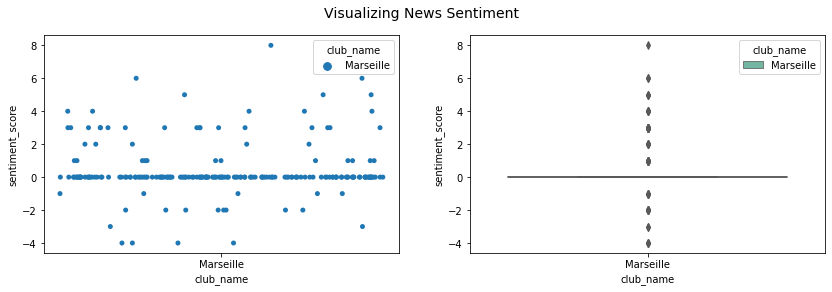

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='club_name', y="sentiment_score", 
                   hue='club_name', data=df, ax=ax1)
bp = sns.boxplot(x='club_name', y="sentiment_score", 
                 hue='club_name', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

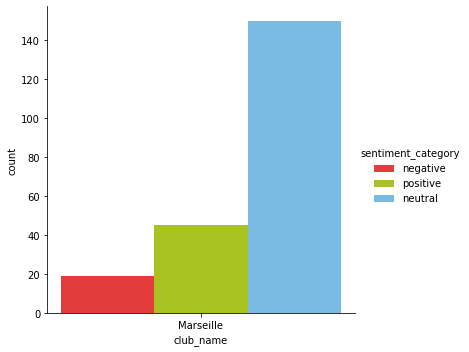

In [57]:
fc = sns.factorplot(x="club_name", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [60]:
pos_idx = df[(df.club_name=='Marseille') & (df.sentiment_score == 8)].index[0]
neg_idx = df[(df.club_name=='Marseille') & (df.sentiment_score == -4)].index[0]

print('Most Negative Tweet regarding Paris:', tweet_text.iloc[neg_idx][['text']][0])
print()
print('Most Positive Tweet regarding Paris:', tweet_text.iloc[pos_idx][['text']][0])

Most Negative Tweet regarding Paris: @mccourtglobal @nytimes here are the results : - sell the club 100% - stay with dick face eyraud 0% #teamom

Most Positive Tweet regarding Paris: @avb @loic_93 can you please put #teamom in your bio that would be very funny and appreciated by all supporters
